In [1]:
import numpy    as np
# from numpy.testing._private.utils import decorate_methods
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
from time import time

# from sklearn                 import pipeline
# from sklearn                 import impute
# from sklearn                 import compose
# from sklearn.preprocessing   import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_absolute_error, accuracy_score, balanced_accuracy_score, plot_confusion_matrix
# from sklearn                 import set_config

from sklearn.linear_model  import LogisticRegression, LinearRegression
# from sklearn.naive_bayes   import MultinomialNB
# from sklearn.svm           import SVC
# from sklearn.neighbors     import KNeighborsClassifier
# from sklearn.tree          import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.ensemble      import RandomForestClassifier, RandomForestRegressor
# from sklearn.ensemble      import ExtraTreesClassifier, ExtraTreesRegressor
# from sklearn.ensemble      import AdaBoostClassifier, AdaBoostRegressor
# from sklearn.ensemble      import GradientBoostingClassifier, GradientBoostingRegressor
# from sklearn.ensemble      import HistGradientBoostingClassifier
# from xgboost               import XGBClassifier, XGBRegressor
# from lightgbm              import LGBMClassifier, LGBMRegressor
# from catboost              import CatBoostClassifier, CatBoostRegressor

np.random.seed(0)

In [2]:
data = pd.read_csv('./climate.csv')
data = data.drop(['Date Time'], axis=1)
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


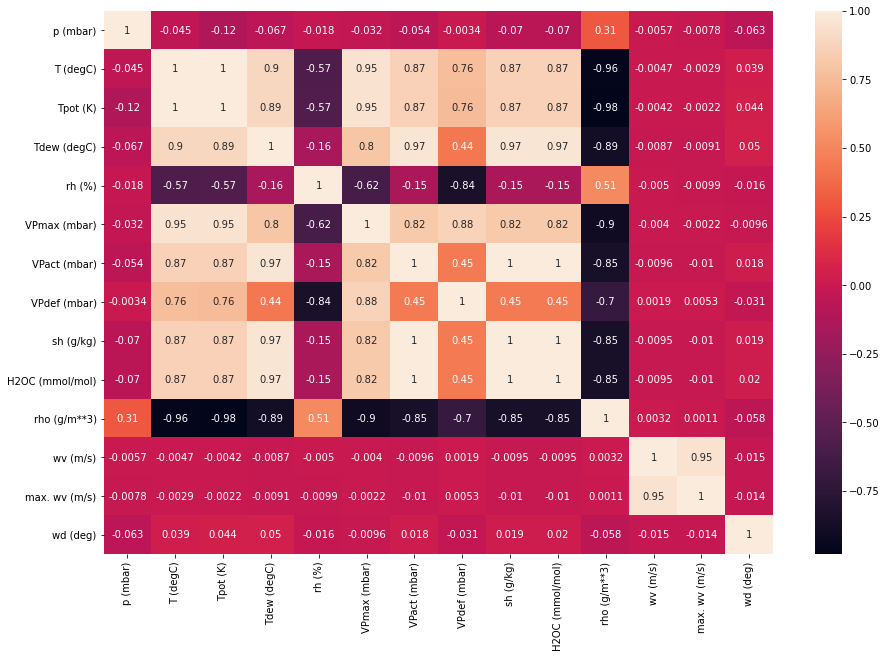

In [4]:
plt.figure(figsize=(15,10))
sb.heatmap(data.corr(), annot=True)
plt.show()

In [17]:
import pairing as pair

x, y = pair.pairing(data)
print(x.shape)
print(y.shape)

(60078, 84)
(60078,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [16]:
start = time()

model = LinearRegression()

model.fit(x_train, y_train)

preds = model.predict(x_test)

end = time() - start

df = pd.DataFrame({'-Predictions-': preds, '-Actual Temperature-': y_test})
mae = mean_absolute_error(y_test, preds)
print(f'Time: {round(end, 3)} seconds\nMAE: {round(mae, 4)}\nResults comparison: \n\n{df}')

Time: 0.183 seconds
MAE: 0.1296
Results comparison: 

       -Predictions-  -Actual Temperature-
0          17.583460                 17.74
1          20.244216                 20.26
2          -7.107179                 -7.11
3           4.945540                  4.87
4          -0.878724                 -0.88
...              ...                   ...
12011       6.101006                  5.93
12012       6.230334                  6.23
12013      12.463837                 12.47
12014       1.106641                  1.15
12015      21.885980                 22.02

[12016 rows x 2 columns]
